In [16]:
root_path = '/home/drl/PycharmProjects/rl_baselines/pytorch-a2c-ppo-acktr'
import os 
os.chdir(root_path)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from utils import IO
from utils.Logger import LoggerCsv
from eval.plot_results import *
from math import pi, sin, cos

 v_e = eval_data_df.loc[:, '1':'6'].values

c_command = eval_data_df.loc[:, '7':'9'].values

xyz = eval_data_df.loc[:, '10':'12'].values

In [2]:
#GA_data_path = 'eval/results_any/F1_straight_line_ga_rl/originals/GA_straight_line'

exp_id = 27
num_data = 1

RL_data_path = 'eval/results_any/F3_turning/original'


exp_data_path = os.path.join(RL_data_path, 'No{}'.format(exp_id))
exp_dir_list = os.listdir(exp_data_path)
exp_dir_list

['log_data_s18.csv']

In [3]:
save_fig_path = 'eval/results_any/F3_turning'


GA_data_df = []
RL_data_df =[]
for i in range(num_data):
    rl_data_df = pd.read_csv(os.path.join(exp_data_path,exp_dir_list[i].format(i)))
    RL_data_df.append(rl_data_df)

max_step = 2000
dt = 0.01

In [4]:
exp_i = 0
xyz = RL_data_df[exp_i].loc[:, '10':'12'].values
v_e = RL_data_df[exp_i].loc[:, '1':'6'].values
c_command = RL_data_df[exp_i].loc[:, '7':'9'].values

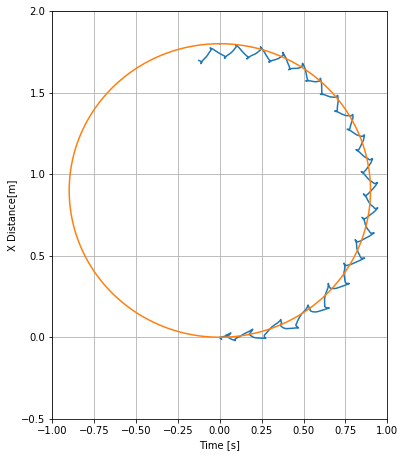

In [25]:

plt.figure(figsize=(6,6*1.25))
 
t = np.arange(0, max_step * dt, dt)
 
R = c_command[0, 0]
n = np.arange(0, pi*2, 0.01)
x_f = R * np.sin(n)
y_f = R * np.cos(n) +R

pos_x = xyz[:max_step, 0]
pos_y = xyz[:max_step, 1]

vel_f = c_command[:max_step, 0]



plt.plot(pos_x, pos_y)
plt.plot(x_f, y_f)

plt.xlabel('Time [s]')
plt.ylabel('X Distance[m]')
plt.grid(True)
plt.xlim([-1,1])
plt.ylim([-0.5,2])
# axs[1].plot(t, vel,  label = 'v')
# axs[1].plot(t, vel_f,  label = 'ref')
# axs[1].set_ylim(0,0.3)
# axs[1].set_xlabel('Time [s]')
# axs[1].set_ylabel('X Velocity [m/s]')
# axs[1].grid(True)
 
#fig.tight_layout()

plt.savefig(os.path.join(save_fig_path, 'EXP{}-No{}_f2{}.jpg'.format(exp_id, exp_i, exp_dir_list[exp_i])))
plt.show()

In [50]:
pos_f

array([2.50000e-02, 5.00000e-02, 7.50000e-02, ..., 2.12075e+02,
       2.12225e+02, 2.12375e+02])

In [20]:
exp_i = 1 
xyz = RL_data_df[exp_i].loc[:, '10':'12'].values
v_e = RL_data_df[exp_i].loc[:, '1':'6'].values
c_command = RL_data_df[exp_i].loc[:, '7':'9'].values

<Figure size 432x288 with 0 Axes>

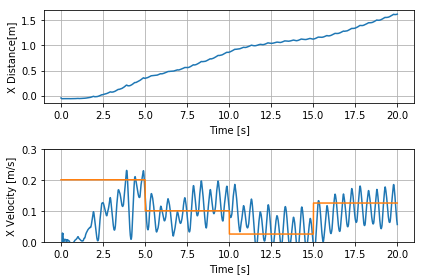

In [21]:

plt.figure()
 
t = np.arange(0, max_step * dt, dt)
 

pos = xyz[:max_step, 0]
vel = v_e[:max_step, 0]
vel_f = c_command[:max_step, 0]

fig, axs = plt.subplots(2, 1)
axs[0].plot(t, pos)
#axs[0].set_ylim(0, 2)
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('X Distance[m]')
axs[0].grid(True)


axs[1].plot(t, vel,  label = 'v')
axs[1].plot(t, vel_f,  label = 'ref')
axs[1].set_ylim(0,0.3)
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('X Velocity [m/s]')
axs[1].grid(True)



fig.tight_layout()
plt.show()

In [79]:
com  = pd.read_csv('eval/com_s1.csv')
command =np.array(com)
command.shape

(2000, 3)

In [29]:
for i in [2,3,5,6,7,8,9,10,12,15]:
    com  = pd.read_csv('eval/cmd_c{}.csv'.format(i))
    command =np.array(com)
    IO('data/cmd_c{}.pkl'.format(i)).to_pickle(command)


In [59]:
a = IO('data/cmd_c6.pkl').read_pickle()
a

array([[399.8,   0. ,   0. ],
       [399.8,   0. ,   0. ],
       [399.8,   0. ,   0. ],
       ...,
       [399.8,   0. ,   0. ],
       [399.8,   0. ,   0. ],
       [399.8,   0. ,   0. ]])

In [56]:
a = IO('data/cmd_s1.pkl').read_pickle()
a.shape

(2000, 3)

In [35]:
np.concatenate((a,a),axis=0) 


for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    

(4000, 3)

In [62]:
for j in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    a = np.array([int(j)/10.0, 0, 0]).reshape((1,-1))
    print(a)
    data = a
    for i in range(4000-1):
        data = np.concatenate((data,a),axis=0) 
    IO('data/cmd_c{}.pkl'.format(str(j))).to_pickle(data)
 

[[0.1 0.  0. ]]
[[0.2 0.  0. ]]
[[0.3 0.  0. ]]
[[0.4 0.  0. ]]
[[0.5 0.  0. ]]
[[0.6 0.  0. ]]
[[0.7 0.  0. ]]
[[0.8 0.  0. ]]
[[0.9 0.  0. ]]
[[1. 0. 0.]]
[[1.1 0.  0. ]]
[[1.2 0.  0. ]]
[[1.3 0.  0. ]]
[[1.4 0.  0. ]]
[[1.5 0.  0. ]]
